In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import pandas as pd
import numpy as np
import glob
from fastai.vision import *
from fastai.metrics import error_rate

In [4]:
images=glob.glob('imagedata/1988/gen/*/*.png')
folder=glob.glob('imagedata/1988/gen/*')

In [5]:
len(folder)

726

In [6]:
lbls=[]
ff=[]
fc=[]
for ele in images:
    posi=ele.rindex("/")
    lbls.append(ele[14:posi])
    posi2=ele[14:posi].index("_page")
    ff.append(ele[14:posi][:posi2])

In [7]:
df = pd.DataFrame(dict(fname=images, label=lbls, fmtitle=ff))

In [8]:
df.loc[df['fmtitle'].str.contains("1040"),"label"].unique().tolist()

['/gen/i1040--1988_page_28',
 '/gen/i1040eza--1988_page_26',
 '/gen/f1040sr--1988_page_2',
 '/gen/i1040--1988_page_43',
 '/gen/i1040--1988_page_10',
 '/gen/f1040sd--1988_page_1',
 '/gen/i1040--1988_page_55',
 '/gen/i1040--1988_page_32',
 '/gen/i1040eza--1988_page_1',
 '/gen/i1040--1988_page_36',
 '/gen/i1040eza--1988_page_34',
 '/gen/i1040eza--1988_page_25',
 '/gen/f1040a--1988_page_1',
 '/gen/i1040eza--1988_page_36',
 '/gen/i1040--1988_page_33',
 '/gen/f1040pr--1988_page_1',
 '/gen/i1040--1988_page_17',
 '/gen/i1040--1988_page_58',
 '/gen/f1040pr--1988_page_3',
 '/gen/f1040sab--1988_page_1',
 '/gen/f1040nr--1988_page_5',
 '/gen/i1040eza--1988_page_38',
 '/gen/i1040--1988_page_16',
 '/gen/f1040a--1988_page_4',
 '/gen/i1040eza--1988_page_51',
 '/gen/f1040ez--1988_page_2',
 '/gen/i1040--1988_page_54',
 '/gen/i1040--1988_page_38',
 '/gen/i1040--1988_page_37',
 '/gen/i1040eza--1988_page_13',
 '/gen/i1040eza--1988_page_9',
 '/gen/i1040--1988_page_1',
 '/gen/i1040--1988_page_12',
 '/gen/i104

In [9]:
forms=df['fmtitle'].unique().tolist()
len(forms),len(df['label'].unique().tolist())

(149, 726)

In [10]:
len(df)

108900

In [11]:
img_size = 224
bs = 64
data2 = ImageDataBunch.from_df('.', df, fn_col='fname', label_col='fmtitle', \
                              ds_tfms=get_transforms(), size=img_size, bs=bs).normalize(imagenet_stats)

In [1]:
learn2 = cnn_learner(data2, models.resnet34, metrics=error_rate)

NameError: name 'cnn_learner' is not defined

In [23]:
learn2.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


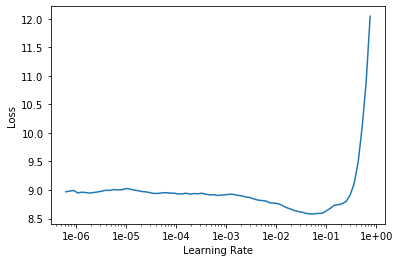

In [24]:
learn2.recorder.plot()

In [25]:
learn2.fit_one_cycle(4, max_lr=0.02)

epoch,train_loss,valid_loss,error_rate,time
0,5.996282,5.416731,0.900609,06:37
1,4.620951,4.076596,0.808461,06:43
2,3.567978,2.943241,0.670530,06:47
3,2.633045,2.269869,0.561866,06:45


In [26]:
learn2.fit_one_cycle(4, max_lr=0.01)

epoch,train_loss,valid_loss,error_rate,time
0,2.863958,3.074358,0.696610,06:50
1,2.929778,2.282308,0.552014,06:40
2,2.295420,1.650081,0.441901,06:41
3,1.795149,1.376033,0.371487,06:41


In [22]:
learn2.model

NameError: name 'learn2' is not defined

In [46]:
fmlist=df['fmtitle'].unique().tolist()
df['fmcat']=0
for i in range(len(fmlist)):
    cat=i%50
    df.loc[df['fmtitle']==fmlist[i],"fmcat"]=cat

In [51]:
img_size = 224
bs = 64
data3 = ImageDataBunch.from_df('.', df, fn_col='fname', label_col='fmcat', \
                              ds_tfms=get_transforms(), size=img_size, bs=bs).normalize(imagenet_stats)

In [50]:
len(df)

172550

In [52]:
learn3 = cnn_learner(data3, models.resnet34, metrics=error_rate)

In [21]:
learn3.model

NameError: name 'learn3' is not defined

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


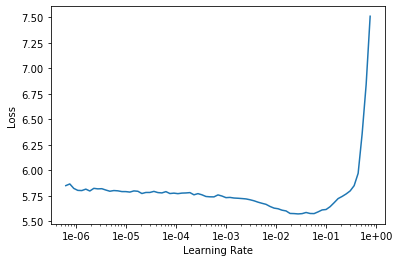

In [49]:
learn3.lr_find()
learn3.recorder.plot()

In [ ]:
learn3.fit_one_cycle(4,max_lr=0.001)

epoch,train_loss,valid_loss,error_rate,time
0,1.673023,1.041234,0.278238,1:03:05
1,1.657996,0.959829,0.256360,40:24
2,1.571230,0.906418,0.240742,49:33


In [54]:
learn3.save("stage-1")

In [59]:

interp = ClassificationInterpretation.from_learner(learn2)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

False

In [33]:
df

,fname,label,fmtitle,fmcat
0,imagedata2/gen/f8654_page_1/f8654_page_1_2.png,f8654_page_1,f8654,0
1,imagedata2/gen/f8654_page_1/f8654_page_1_3.png,f8654_page_1,f8654,0
2,imagedata2/gen/f8654_page_1/f8654_page_1_4.png,f8654_page_1,f8654,0
3,imagedata2/gen/f8654_page_1/f8654_page_1_1.png,f8654_page_1,f8654,0
4,imagedata2/gen/f8654_page_1/f8654_page_1_5.png,f8654_page_1,f8654,0
...,...,...,...,...
17250,imagedata2/gen/f1099s_page_1/f1099s_page_1_3.png,f1099s_page_1,f1099s,48
17251,imagedata2/gen/f1099s_page_1/f1099s_page_1_1.png,f1099s_page_1,f1099s,48
17252,imagedata2/gen/f1099s_page_1/f1099s_page_1_2.png,f1099s_page_1,f1099s,48
17253,imagedata2/gen/f1099s_page_1/f1099s_page_1_5.png,f1099s_page_1,f1099s,48


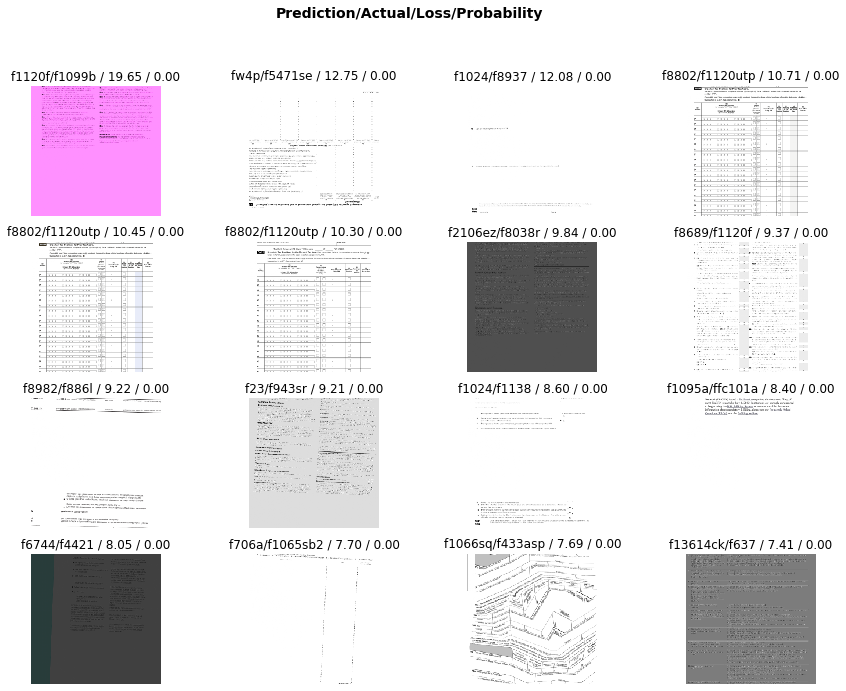

In [60]:
interp.plot_top_losses(16, figsize=(15,11))